In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
#import libraries

In [20]:
calendar= pd.read_csv("C:\\Users\\nayav\\Downloads\\airbnb\\calendar.csv")
#import data

In [21]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


it seems when available is f price is 'NaN'

In [23]:
calendar_df.groupby('available')['price'].count()

available
f         0
t    934542
Name: price, dtype: int64

Confirmed that when available is f price is null

In [24]:
#drop null values
calendar.dropna(inplace=True)

In [26]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


In [27]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) #change price to float data type

In [28]:
calendar['date'] = pd.to_datetime(calendar['date']) #change date to datetime data type

# Seasonal Analysis

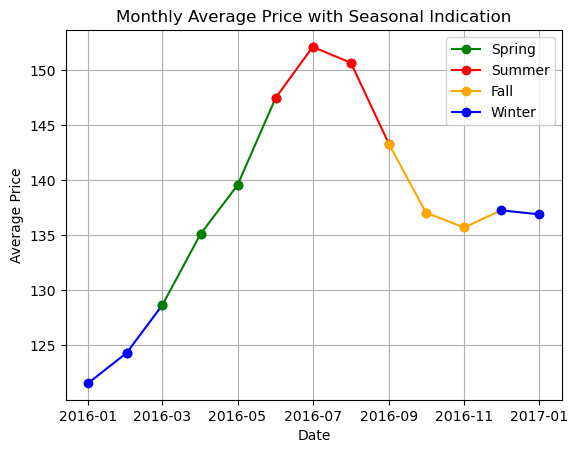

In [7]:
#extracting month from date to assign season
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
def assign_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

calendar['season'] = calendar['month'].apply(assign_season)

monthly_avg = calendar.groupby(['year', 'month'])['price'].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))
monthly_avg['season'] = monthly_avg['month'].apply(assign_season)

colors = {
    'Spring': 'green',
    'Summer': 'red',
    'Fall': 'orange',
    'Winter': 'blue'
}

for i in range(len(monthly_avg) - 1):
    start_point = monthly_avg.iloc[i]
    end_point = monthly_avg.iloc[i + 1]
    
    plt.plot([start_point['date'], end_point['date']],
             [start_point['price'], end_point['price']],
             color=colors[start_point['season']],
             marker='o')

for season, color in colors.items():
    plt.plot([], [], color=color, label=season, marker='o')

plt.title('Monthly Average Price with Seasonal Indication')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

# Trend with respect to Day of The Week

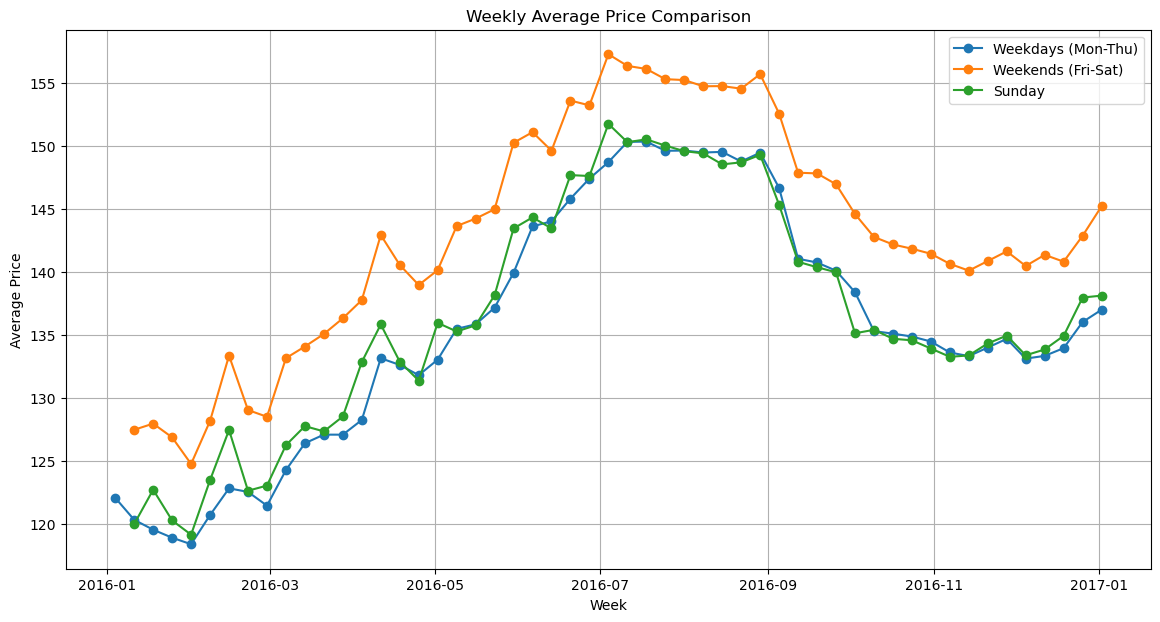

In [13]:
calendar['day_of_week'] = calendar['date'].dt.day_name()

weekdays = calendar[calendar['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]
weekends = calendar[calendar['day_of_week'].isin(['Friday', 'Saturday'])]
su= calendar[calendar['day_of_week'].isin(['Sunday'])]

weekdays.set_index('date', inplace=True)
weekends.set_index('date', inplace=True)
su.set_index('date', inplace=True)

weekdays_avg = weekdays['price'].resample('W-MON').mean()
weekends_avg = weekends['price'].resample('W-MON').mean()
s_avg= su['price'].resample('W-MON').mean()

plt.figure(figsize=(14, 7))
plt.plot(weekdays_avg, label='Weekdays (Mon-Thu)', marker='o')
plt.plot(weekends_avg, label='Weekends (Fri-Sat)', marker='o')
plt.plot(s_avg, label='Sunday', marker='o')
plt.title('Weekly Average Price Comparison')
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

# STL Anaylsis

In [14]:
avg_price_by_date = calendar.groupby('date')['price'].mean()

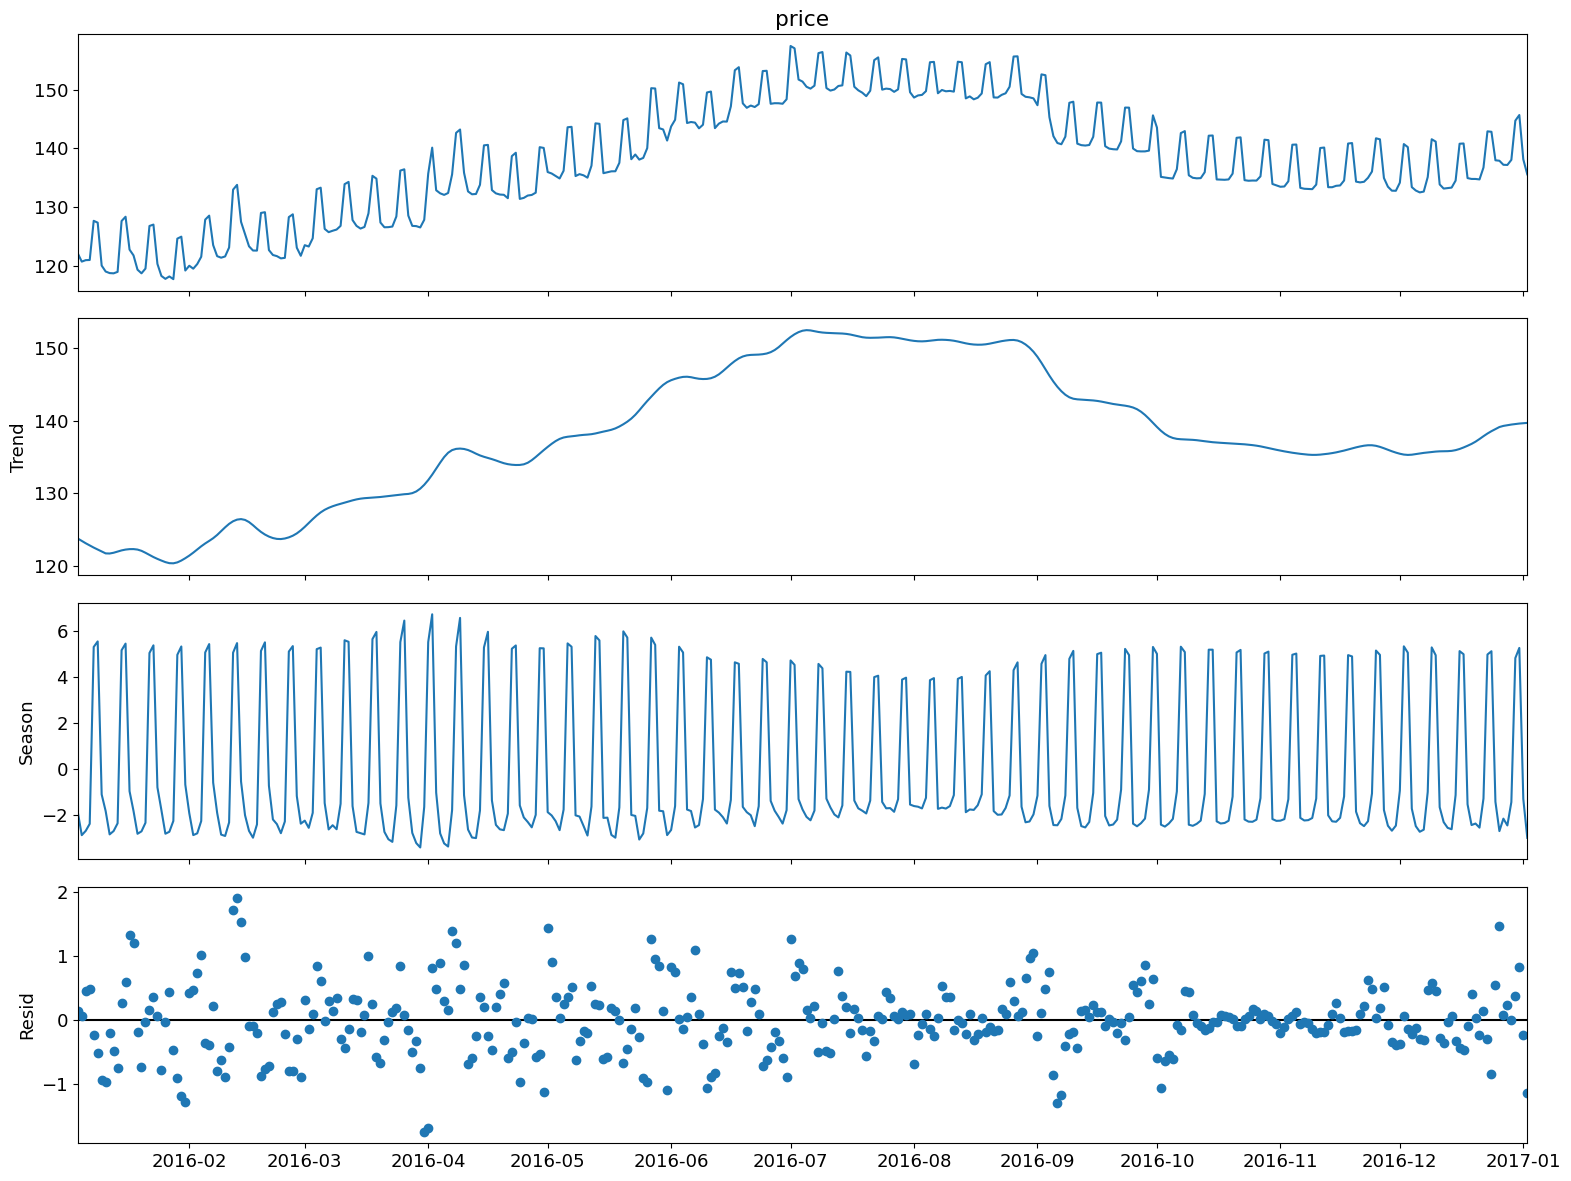

In [16]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
stl = STL(avg_price_by_date, period=7)
res = stl.fit()
fig = res.plot()